# Human Resources Data Analytics

### First of all, lets import all the needed libraries fellas, shall we?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import seaborn as sns

import pandas.util.testing as tm
import warnings
warnings.filterwarnings("ignore")

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Second of all, load the dataset

In [2]:
df = pd.read_csv('C:/Users/ASUS/Downloads/hrd.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Clean it before analyzing it! That's mandatory

In [3]:
# Cleaning Missing Value

missing_value_before = df.isna().sum()
print('Missing value before:', missing_value_before)

df = df.dropna(how='all')
missing_value_after = df.isna().sum()
print('Missing value after:', missing_value_after)

Missing value before: satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64
Missing value after: satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


In [4]:
# Unfortunately, we cannot perform drop duplicates because there is no id attribute in the dataset, which can differentiate each
# row. But if you want to perform it, uncomment below code.

# Cleaning Duplicates

# duplicates_before = df.duplicated().sum()
# print('Duplicates before:', duplicates_before)

# df = df.drop_duplicates()
# duplicates_after = df.duplicated().sum()
# print('Duplicates after:', duplicates_after)

### Now, lets jump into the real field, ANALYSIS

### First, we have to know "The Surface" of our data

In [5]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Is it just me who notice that "sales" column should be "position" column? 

In [6]:
df = df.rename(columns={"sales": "position"})
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,position,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Who left? who didn't?

In [7]:
df_left = df[df.left == 1]
df_not_left = df[df.left == 0]

print('Number of people who left:', df_left.shape[0])
print('Number of people who did not left:', df_not_left.shape[0])

Number of people who left: 3571
Number of people who did not left: 11428


### It's time for visualization to take over

### Hunting down outliars!!!

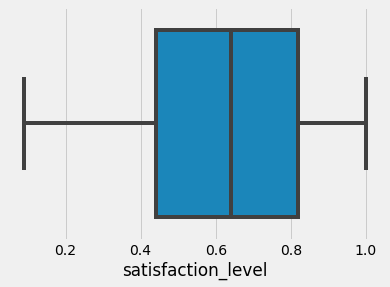

In [8]:
### We use boxplot to detect outliers. Every value that is far away from minimum or maximum range will be considered 
### as outliers.

sns.boxplot(df['satisfaction_level'])
plt.show()

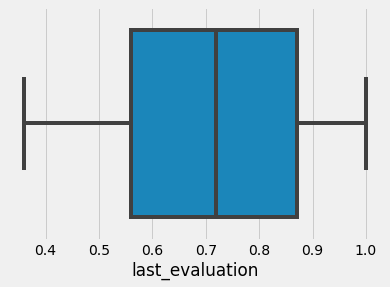

In [9]:
sns.boxplot(df['last_evaluation'])
plt.show()

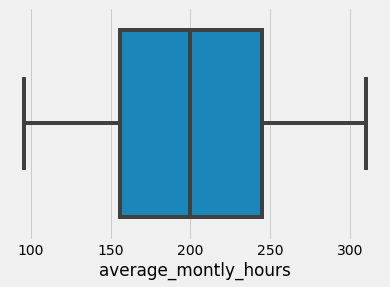

In [10]:
sns.boxplot(df['average_montly_hours'])
plt.show()

### How was the relationship in the neighborhood ?

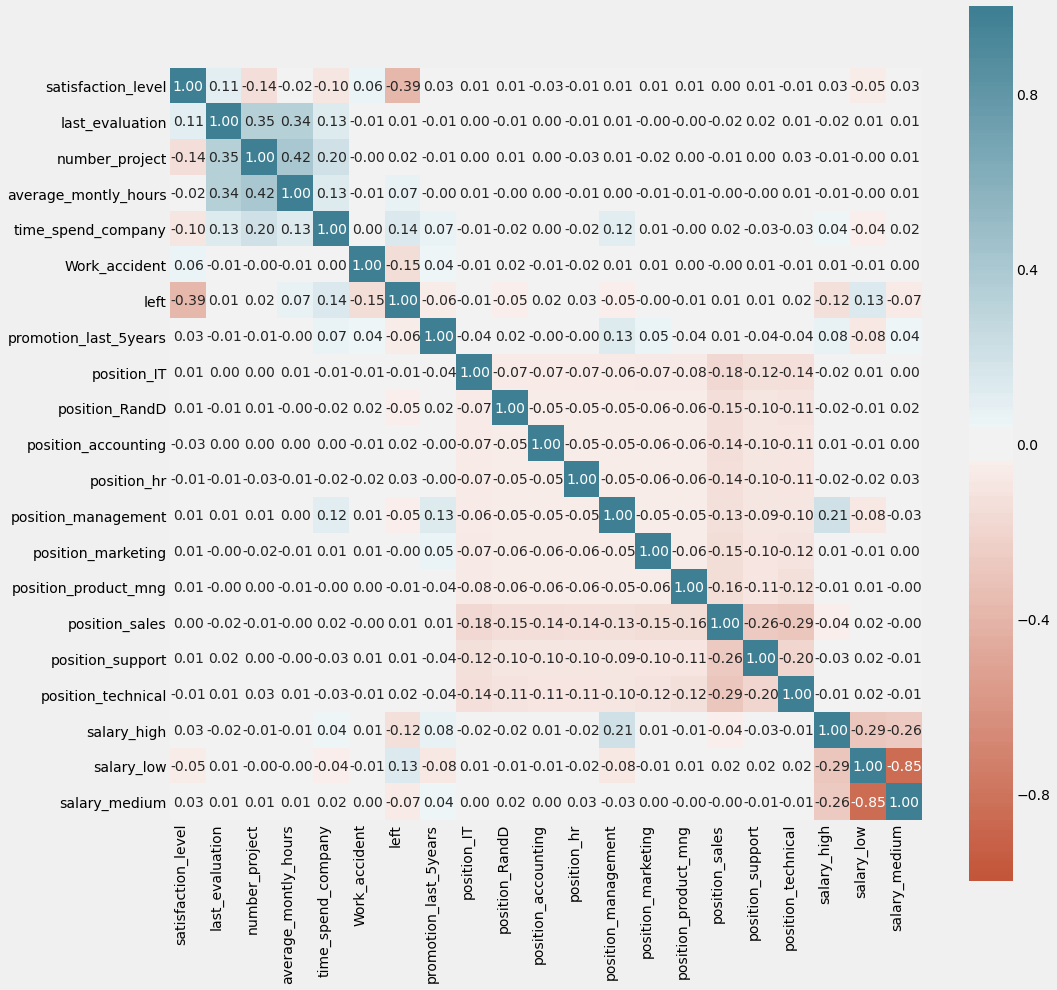

In [11]:
from sklearn.preprocessing import LabelEncoder

plt.figure(figsize=(15,15))

df_corr = pd.get_dummies(df)

corr = df_corr.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt= '.2f')

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right')

plt.show()


### In Left Group

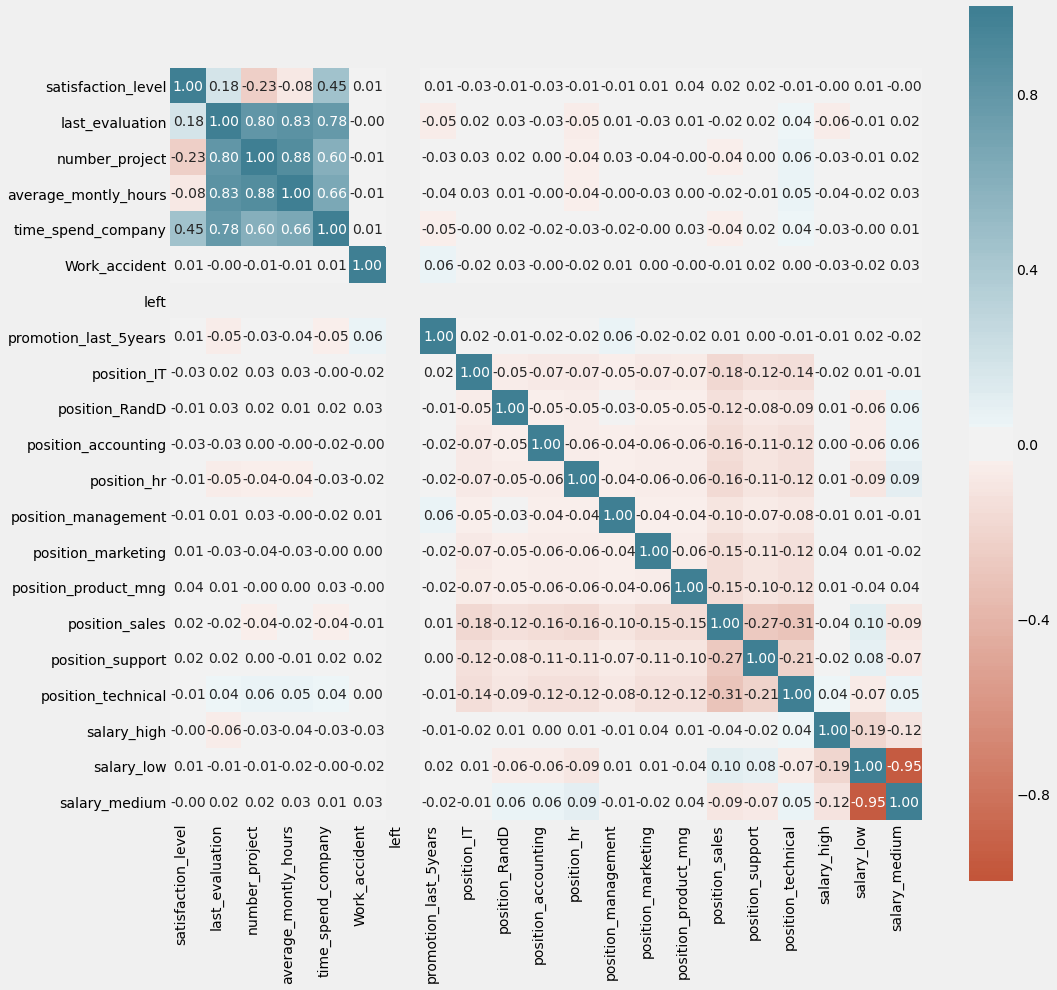

In [12]:
plt.figure(figsize=(15,15))

df_corr = pd.get_dummies(df_left)

corr = df_corr.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt= '.2f')

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right')

plt.show()


### In Not-Left Group

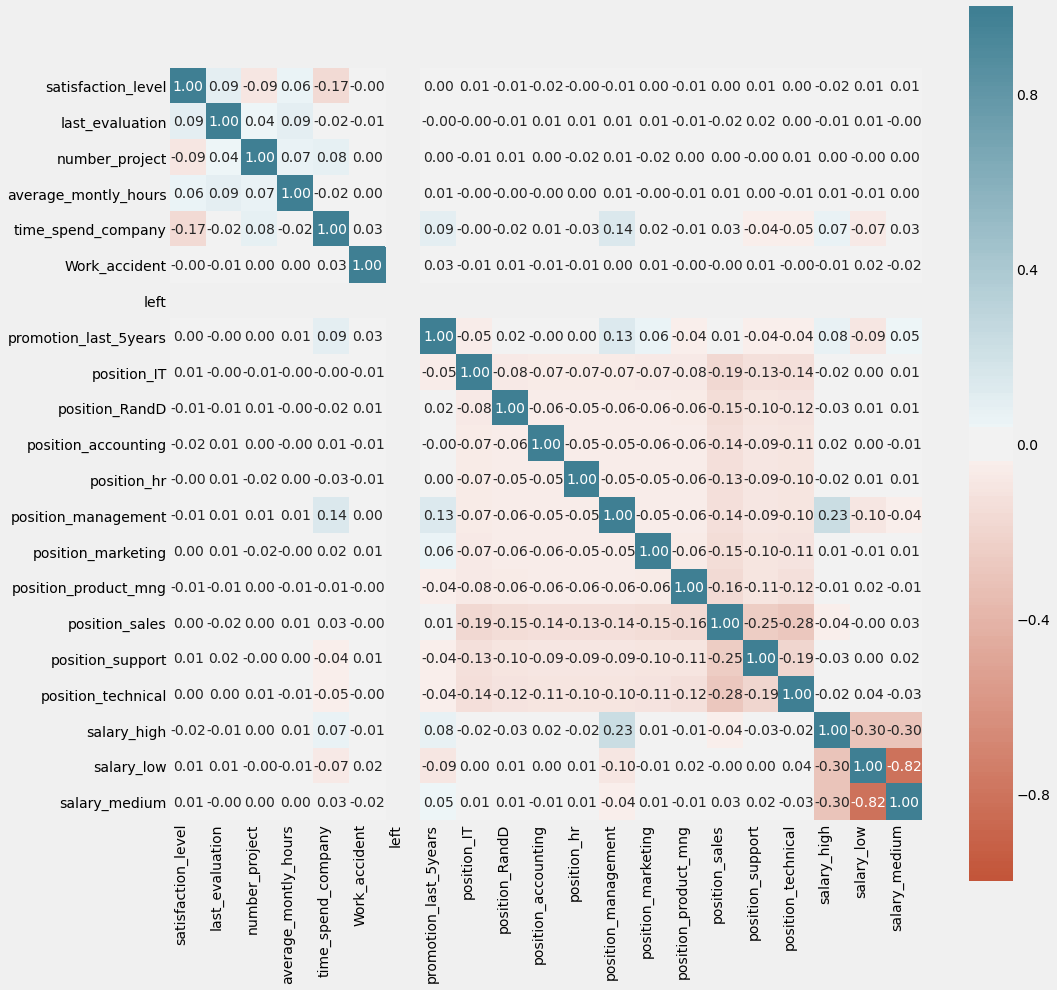

In [13]:
plt.figure(figsize=(15,15))

df_corr = pd.get_dummies(df_not_left)

corr = df_corr.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt= '.2f')

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right')

plt.show()


### How satisfied employees who left compared to who didn't left? 
#### Or we might want to say "How many amongst them was born to be a Warrior?"

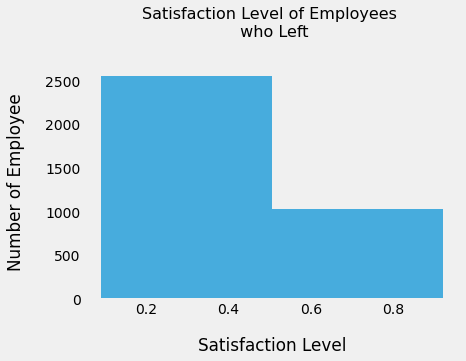

In [14]:
plt.hist(df_left['satisfaction_level'], alpha=0.7, bins=2) ### Change the bins to see more real histogram
plt.title('Satisfaction Level of Employees \n who Left', fontsize=16, y=1.1)
plt.xlabel('Satisfaction Level', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.show()

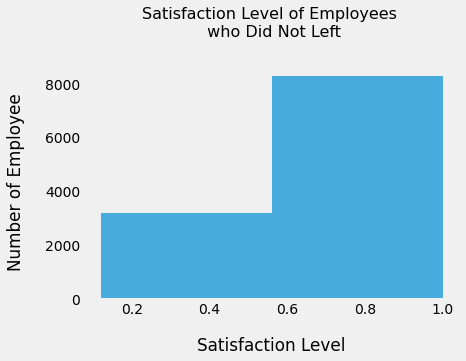

In [15]:
df_not_left['satisfaction_level'].plot.hist(alpha=0.7, bins=2)
plt.title('Satisfaction Level of Employees \n who Did Not Left', fontsize=16, y=1.1)
plt.xlabel('Satisfaction Level', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.show()


### How about the last evaluation for both employees who left and didn't? (How far they have screwd up?)

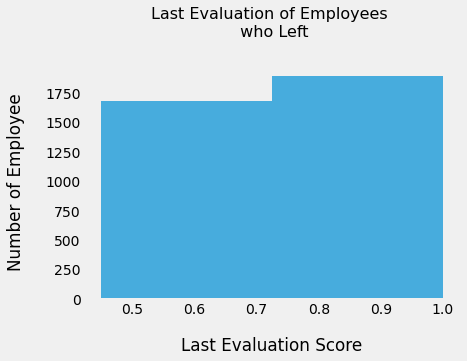

In [16]:
df_left['last_evaluation'].plot.hist(alpha=0.7, bins=2)
plt.title('Last Evaluation of Employees \n who Left', fontsize=16, y=1.1)
plt.xlabel('Last Evaluation Score', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.show()


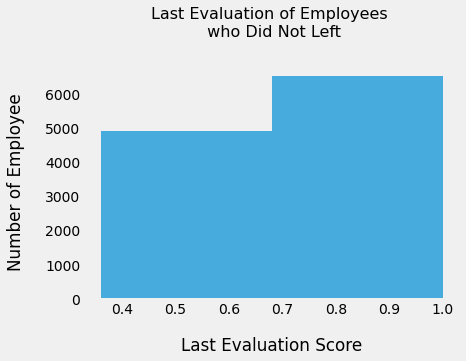

In [17]:
df_not_left['last_evaluation'].plot.hist(alpha=0.7, bins=2)
plt.title('Last Evaluation of Employees \n who Did Not Left', fontsize=16, y=1.1)
plt.xlabel('Last Evaluation Score', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.show()


### This is how they spend their hours per month (How long it takes for them to say goodbye to their boss after 8 hours work?)

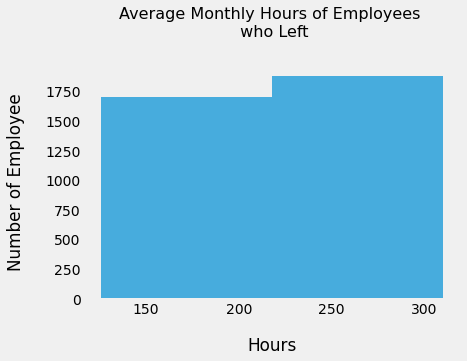

In [18]:
df_left['average_montly_hours'].plot.hist(alpha=0.7, bins=2)
plt.title('Average Monthly Hours of Employees \n who Left', fontsize=16, y=1.1)
plt.xlabel('Hours', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.show()


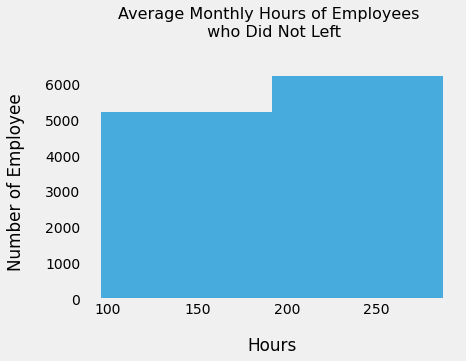

In [19]:
df_not_left['average_montly_hours'].plot.hist(alpha=0.7, bins=2)
plt.title('Average Monthly Hours of Employees \n who Did Not Left', fontsize=16, y=1.1)
plt.xlabel('Hours', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.show()


### The number of project they have taken (How many masterpiece they have created?)

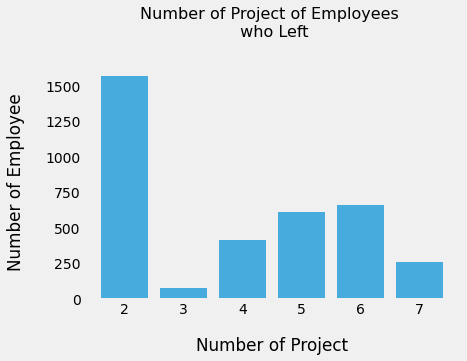

In [20]:
value_left = df_left['number_project'].value_counts().values.tolist()
label_left = df_left['number_project'].value_counts().keys().tolist()

plt.bar(label_left, value_left, alpha=0.7)
plt.title('Number of Project of Employees \n who Left', fontsize=16, y=1.1)
plt.xlabel('Number of Project', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.show()


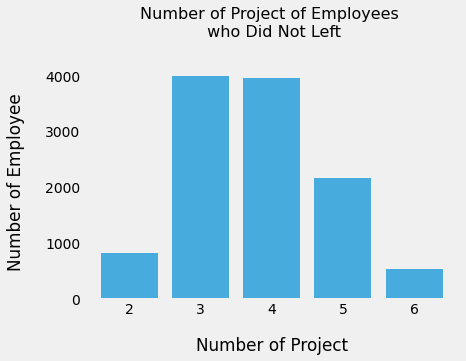

In [21]:
value_not_left = df_not_left['number_project'].value_counts().values.tolist()
label_not_left = df_not_left['number_project'].value_counts().keys().tolist()

plt.bar(label_not_left, value_not_left, alpha=0.7)
plt.title('Number of Project of Employees \n who Did Not Left', fontsize=16, y=1.1)
plt.xlabel('Number of Project', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.show()


### How many years they have spent serving the company? (How many time they have spent to create that masterpiece?)

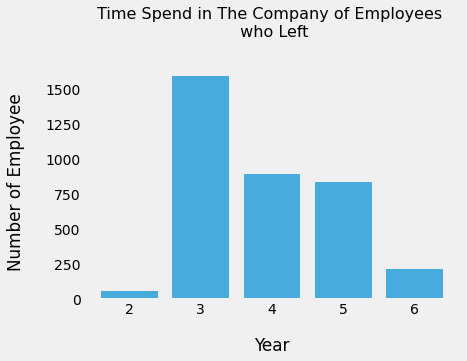

In [22]:
value_left = df_left['time_spend_company'].value_counts().values.tolist()
label_left = df_left['time_spend_company'].value_counts().keys().tolist()

plt.bar(label_left, value_left, alpha=0.7)
plt.title('Time Spend in The Company of Employees \n who Left', fontsize=16, y=1.1)
plt.xlabel('Year', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.show()


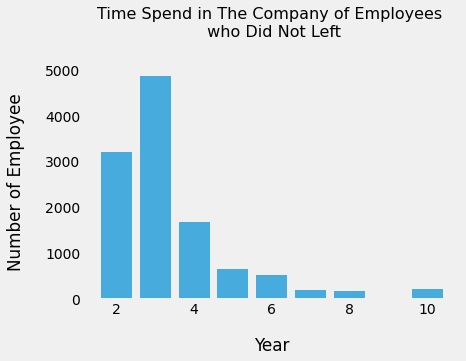

In [23]:
value_not_left = df_not_left['time_spend_company'].value_counts().values.tolist()
label_not_left = df_not_left['time_spend_company'].value_counts().keys().tolist()

plt.bar(label_not_left, value_not_left, alpha=0.7)
plt.title('Time Spend in The Company of Employees \n who Did Not Left', fontsize=16, y=1.1)
plt.xlabel('Year', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.show()


### Have they been involved in a work accident?

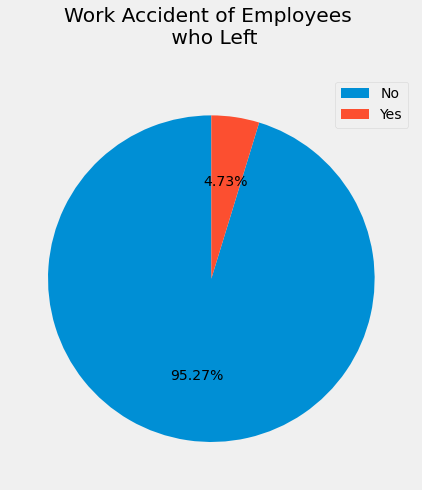

In [24]:
value = df_left['Work_accident'].value_counts().values.tolist()
label = df_left['Work_accident'].replace({0:'No', 1:'Yes'}).value_counts().keys().tolist()

plt.figure(figsize=(10,7))
plt.pie(value, autopct='%.2f%%', startangle=90, textprops={'fontsize': 14, 'color':'black'})
plt.title('Work Accident of Employees \n who Left', y=1.06)
plt.legend(label, loc='upper right')
plt.show()

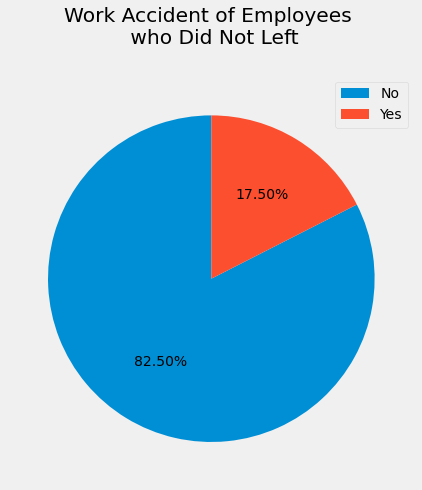

In [25]:
value = df_not_left['Work_accident'].value_counts().values.tolist()
label = df_left['Work_accident'].replace({0:'No', 1:'Yes'}).value_counts().keys().tolist()

plt.figure(figsize=(10,7))
plt.pie(value, autopct='%.2f%%', startangle=90, textprops={'fontsize': 14, 'color':'black'})
plt.title('Work Accident of Employees \n who Did Not Left', y=1.06)
plt.legend(label, loc='upper right')
plt.show()

### Did they get a promotion for the last 5 years? (How much patient they have?)

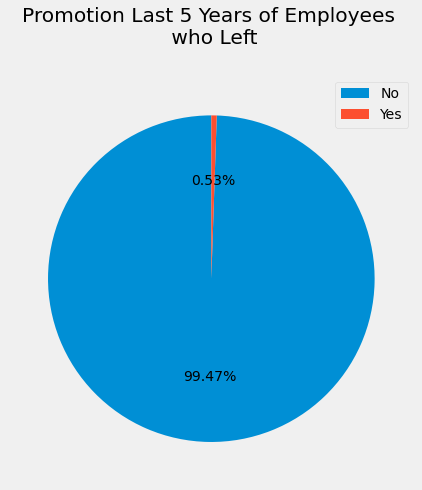

In [26]:
value = df_left['promotion_last_5years'].value_counts().values.tolist()
label = df_left['Work_accident'].replace({0:'No', 1:'Yes'}).value_counts().keys().tolist()

plt.figure(figsize=(10,7))
plt.pie(value, autopct='%.2f%%', startangle=90, textprops={'fontsize': 14, 'color':'black'})
plt.title('Promotion Last 5 Years of Employees \n who Left', y=1.06)
plt.legend(label, loc='upper right')
plt.show()

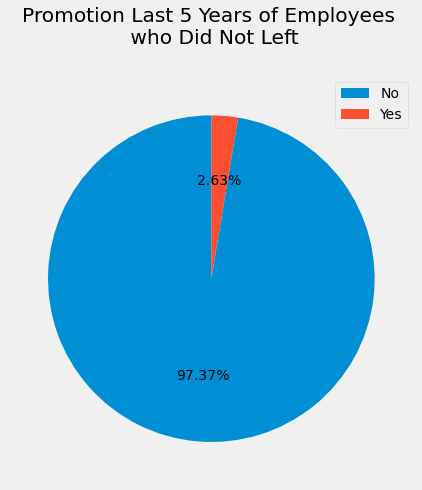

In [27]:
value = df_not_left['promotion_last_5years'].value_counts().values.tolist()
label = df_left['Work_accident'].replace({0:'No', 1:'Yes'}).value_counts().keys().tolist()

plt.figure(figsize=(10,7))
plt.pie(value, autopct='%.2f%%', startangle=90, textprops={'fontsize': 14, 'color':'black'}, wedgeprops = {'linewidth': None})
plt.title('Promotion Last 5 Years of Employees \n who Did Not Left', y=1.06)
plt.legend(label, loc='upper right')
plt.show()

### Who are they? This is short question, but highly precise

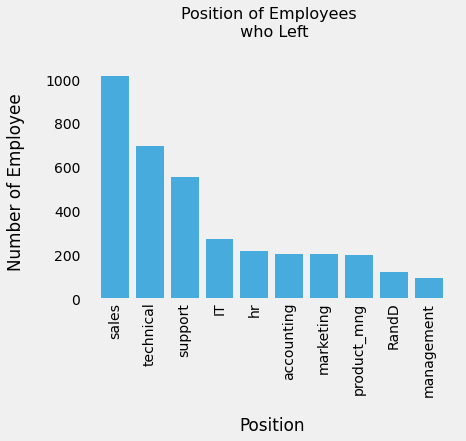

In [28]:

value_left = df_left['position'].value_counts().values.tolist()
label_left = df_left['position'].value_counts().keys().tolist()

plt.bar(label_left, value_left, alpha=0.7)
plt.title('Position of Employees \n who Left', fontsize=16, y=1.1)
plt.xlabel('Position', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.xticks(rotation=90)

plt.show()

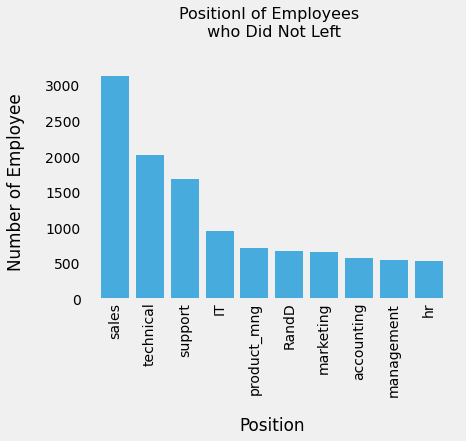

In [29]:
value_left = df_not_left['position'].value_counts().values.tolist()
label_left = df_not_left['position'].value_counts().keys().tolist()

plt.bar(label_left, value_left, alpha=0.7)
plt.title('Positionl of Employees \n who Did Not Left', fontsize=16, y=1.1)
plt.xlabel('Position', labelpad=20)
plt.ylabel('Number of Employee', labelpad=20)
plt.grid(False)
plt.box(False)
plt.xticks(rotation=90)

plt.show()

### What about the most sensitive thing in this working world?
#### Note: "No money, no nothing" 

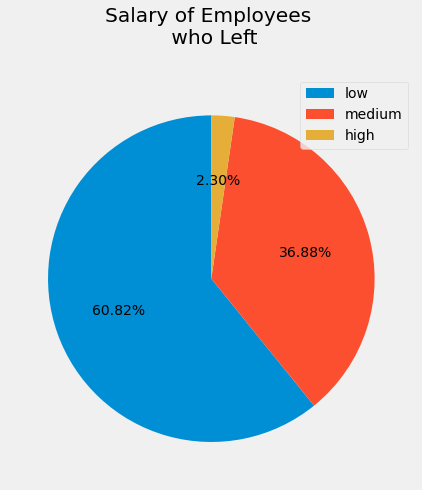

In [30]:
value = df_left['salary'].value_counts().values.tolist()
label = df_left['salary'].value_counts().keys().tolist()

plt.figure(figsize=(10,7))
plt.pie(value, autopct='%.2f%%', startangle=90, textprops={'fontsize': 14, 'color':'black'})
plt.title('Salary of Employees \n who Left', y=1.06)
plt.legend(label, loc='upper right')
plt.show()

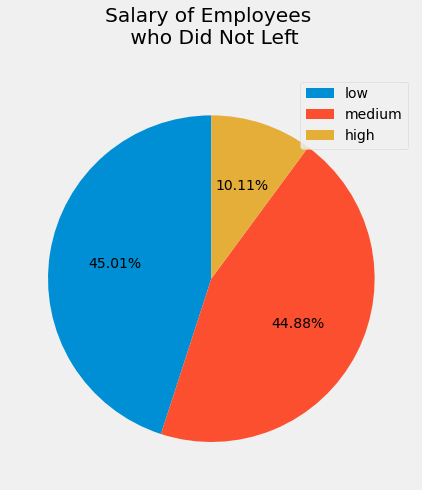

In [31]:
value = df_not_left['salary'].value_counts().values.tolist()
label = df_not_left['salary'].value_counts().keys().tolist()

plt.figure(figsize=(10,7))
plt.pie(value, autopct='%.2f%%', startangle=90, textprops={'fontsize': 14, 'color':'black'})
plt.title('Salary of Employees \n who Did Not Left', y=1.06)
plt.legend(label, loc='upper right')
plt.show()

### Satisfaction level by Salary

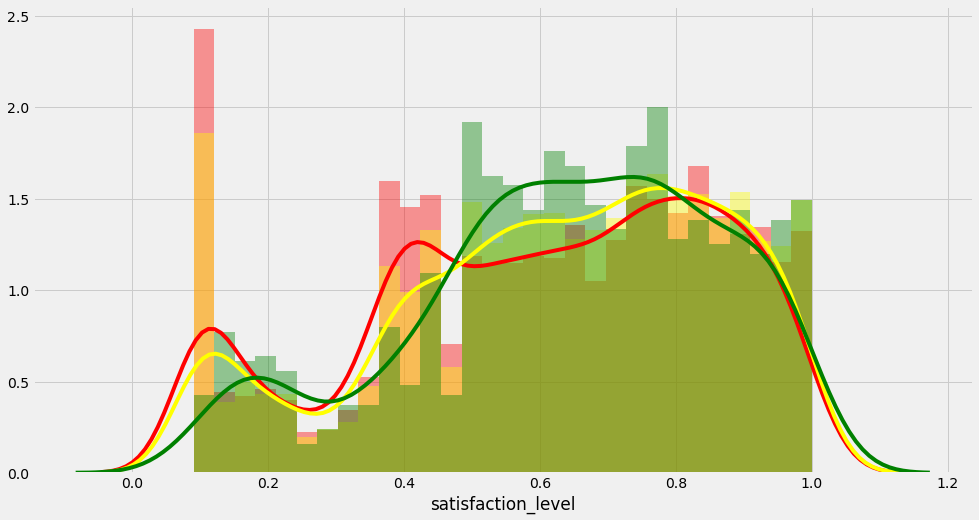

In [32]:
low_salary    = df[df.salary == 'low']
medium_salary = df[df.salary == 'medium']
high_salary   = df[df.salary == 'high']

plt.figure(figsize=(15, 8))
sns.distplot(low_salary.satisfaction_level, bins=30, color='red')
sns.distplot(medium_salary.satisfaction_level, bins=30, color='yellow')
sns.distplot(high_salary.satisfaction_level, bins=30, color='green')


### Satisfaction level by salary in Left Group

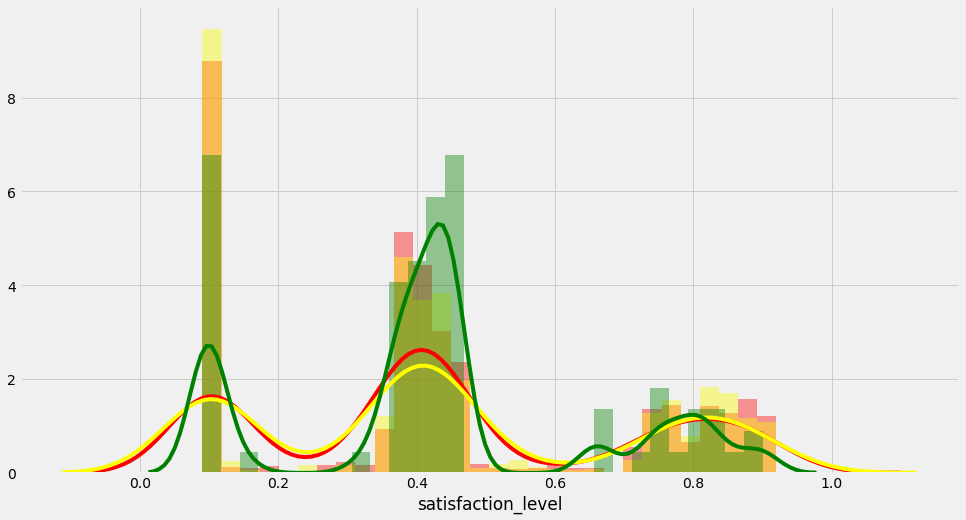

In [33]:
low_salary    = df_left[df_left.salary == 'low']
medium_salary = df_left[df_left.salary == 'medium']
high_salary   = df_left[df_left.salary == 'high']

plt.figure(figsize=(15, 8))
sns.distplot(low_salary.satisfaction_level, bins=30, color='red')
sns.distplot(medium_salary.satisfaction_level, bins=30, color='yellow')
sns.distplot(high_salary.satisfaction_level, bins=30, color='green')


### Satisfaction level by salary in Not-Left Group

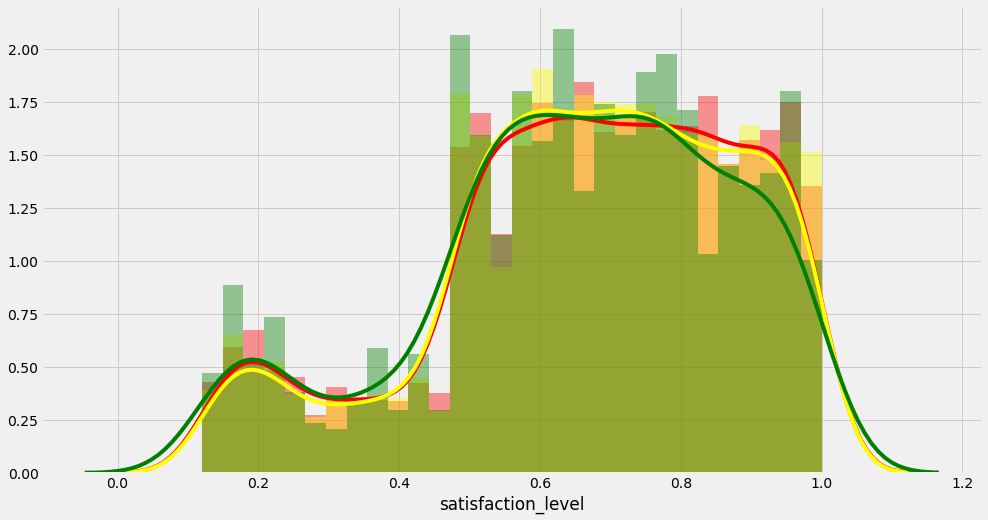

In [34]:
low_salary    = df_not_left[df_not_left.salary == 'low']
medium_salary = df_not_left[df_not_left.salary == 'medium']
high_salary   = df_not_left[df_not_left.salary == 'high']

plt.figure(figsize=(15, 8))
sns.distplot(low_salary.satisfaction_level, bins=30, color='red')
sns.distplot(medium_salary.satisfaction_level, bins=30, color='yellow')
sns.distplot(high_salary.satisfaction_level, bins=30, color='green')


### Satisfaction Level by Position

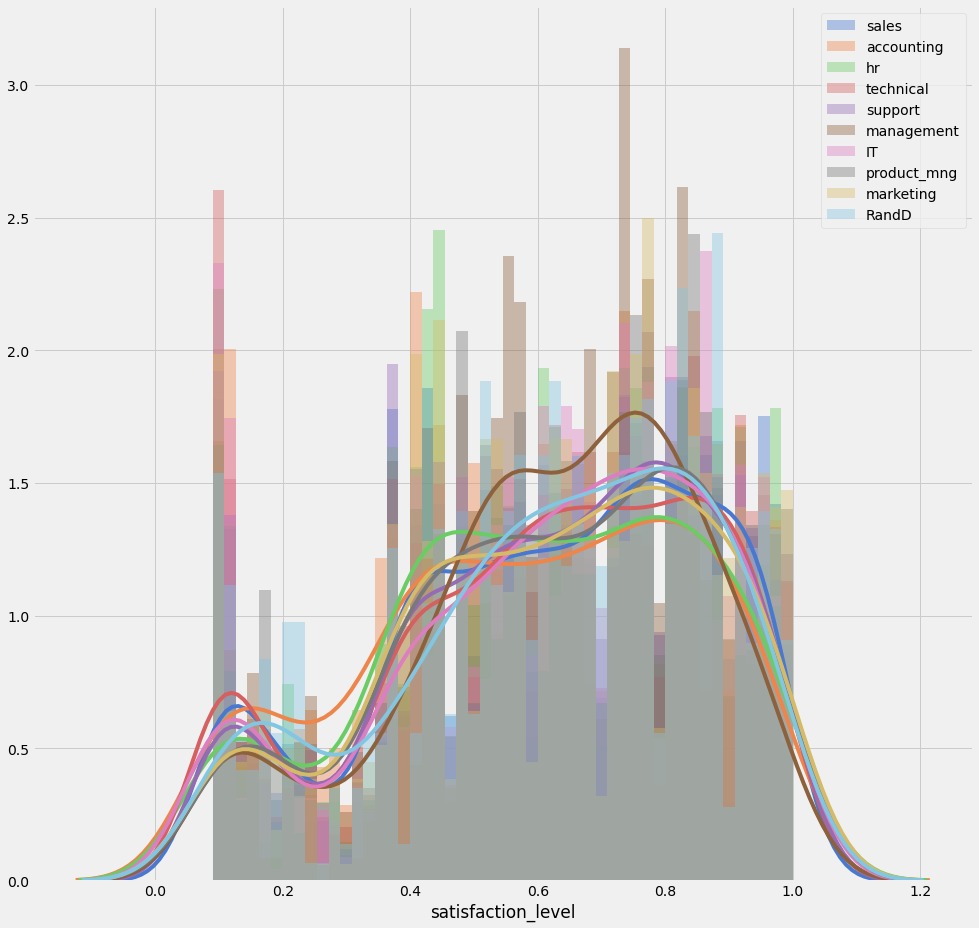

In [35]:
plt.figure(figsize=(15,15))

position_unique = df.position.unique()

with sns.color_palette("muted", 10):
    for i in position_unique:
        i_position = df[df.position == i]
        sns.distplot(i_position.satisfaction_level, bins=50)
        plt.legend(position_unique)


### Lets say that we want to predict wether an employee will leave the company or not based on the obtained data. We can do that as a classification task using classification algorithm 

### Preprocessing the data first

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

encoded_columns = ['Work_accident', 'left', 'promotion_last_5years']
scaled_columns  = ['satisfaction_level', 'last_evaluation', 'average_montly_hours']

df.number_project = df.number_project.astype(str)
df.time_spend_company = df.time_spend_company.astype(str)

df = pd.get_dummies(df)

encoder = LabelEncoder()
for i in encoded_columns:
    df[i] = encoder.fit_transform(df[i])
    
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[scaled_columns])
scaled = pd.DataFrame(scaled, columns= scaled_columns)

df = df.drop(columns = scaled_columns, axis = 1)
df = df.merge(scaled, left_index= True, right_index= True, how = "left")
    
df

,Work_accident,left,promotion_last_5years,number_project_2,number_project_3,number_project_4,number_project_5,number_project_6,number_project_7,time_spend_company_10,...,position_product_mng,position_sales,position_support,position_technical,salary_high,salary_low,salary_medium,satisfaction_level,last_evaluation,average_montly_hours
0,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0.318681,0.265625,0.285047
1,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0.780220,0.781250,0.775701
2,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0.021978,0.812500,0.822430
3,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0.692308,0.796875,0.593458
4,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0.307692,0.250000,0.294393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0.340659,0.328125,0.257009
14995,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0.307692,0.187500,0.299065
14996,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0.307692,0.265625,0.219626
14997,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0.021978,0.937500,0.859813


In [37]:
features = df.drop('left', axis=1)
target = df.left

print(features.columns)

Index(['Work_accident', 'promotion_last_5years', 'number_project_2',
       'number_project_3', 'number_project_4', 'number_project_5',
       'number_project_6', 'number_project_7', 'time_spend_company_10',
       'time_spend_company_2', 'time_spend_company_3', 'time_spend_company_4',
       'time_spend_company_5', 'time_spend_company_6', 'time_spend_company_7',
       'time_spend_company_8', 'position_IT', 'position_RandD',
       'position_accounting', 'position_hr', 'position_management',
       'position_marketing', 'position_product_mng', 'position_sales',
       'position_support', 'position_technical', 'salary_high', 'salary_low',
       'salary_medium', 'satisfaction_level', 'last_evaluation',
       'average_montly_hours'],
      dtype='object')


### Splitting it into train and test category

In [38]:
from sklearn.model_selection import train_test_split

features = np.array(features)
target   = np.array(target)

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=123)

print(x_train.shape)
print(x_test.shape)

(11999, 32)
(3000, 32)


### And build a model

In [39]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

score = logreg.score(x_test, y_test)
score

0.8853333333333333

The score for this classifier is 0.9923333333333333


Cross Validation Result:
 [0.992      0.99       0.99333333 0.99133333 0.99333333 0.992
 0.99       0.99266667 0.98733333 0.99666444]




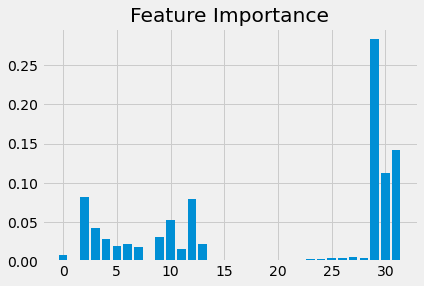

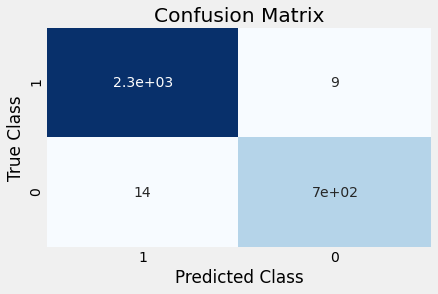

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Predict the test dataset
prediction = clf.predict(x_test)

# See the score
score = clf.score(x_test, y_test)
print('The score for this classifier is', score)
print('\n')

# Validating this classifier using k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Conduct k-fold cross-validation
cv_results = cross_val_score(clf, # Pipeline
                             features, # Feature matrix
                             target, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores

print('Cross Validation Result:\n', cv_results)
print('\n')

# See feature importance of this classifier
importance = clf.feature_importances_

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Feature Importance')
plt.show()
print('\n')

# Create confusion matrix
matrix = confusion_matrix(y_test, prediction)

# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=df.left.unique(), columns=df.left.unique())

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [41]:
from sklearn.svm import SVC

clf1 = SVC()
clf1.fit(x_train, y_train)

score = clf1.score(x_test, y_test)
score

0.9606666666666667

In [42]:
from sklearn.neighbors import KNeighborsClassifier

clf2 = KNeighborsClassifier()
clf2.fit(x_train, y_train)

score = clf2.score(x_test, y_test)
score

0.9403333333333334

In [43]:
from sklearn.tree import DecisionTreeClassifier

clf3 = DecisionTreeClassifier()
clf3.fit(x_train, y_train)

score = clf3.score(x_test, y_test)
score

0.9813333333333333

In [44]:
from sklearn.naive_bayes import BernoulliNB

clf4 = BernoulliNB()
clf4.fit(x_train, y_train)

score = clf4.score(x_test, y_test)
score

0.8636666666666667